In [74]:
#Versions which are used for the project below are:
#python           : 3.9.7.final.0
#pandas           : 1.3.4
#numpy            : 1.20.3
#matplotlib       : 3.4.3


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [76]:
#pd.show_versions()

In [77]:
df=pd.read_csv('D:\diabetes.csv')

In [78]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# ANALYSIS OF DATA

In [79]:
df.head()



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [80]:
df.shape
# Data as 768 rows and 9 columns

(768, 9)

In [81]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

0    500
1    268
Name: Outcome, dtype: int64

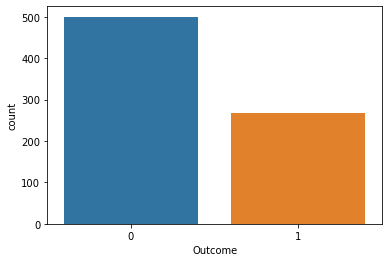

In [82]:
sns.countplot(x='Outcome',data=df)
df['Outcome'].value_counts()

# 0-->Represents non-diabetic people 
# 1-->Represents diabetic people

In [83]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

# Understanding Relationship between the outcome and various factors

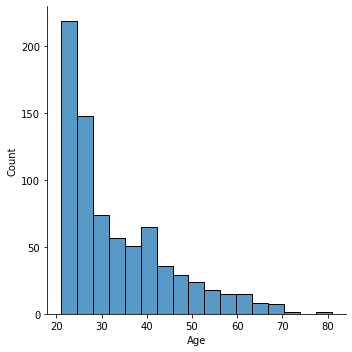

In [84]:
sns.displot(x='Age',data=df)
#Shows the relationship between age of the people and the count of people having disease with given age group


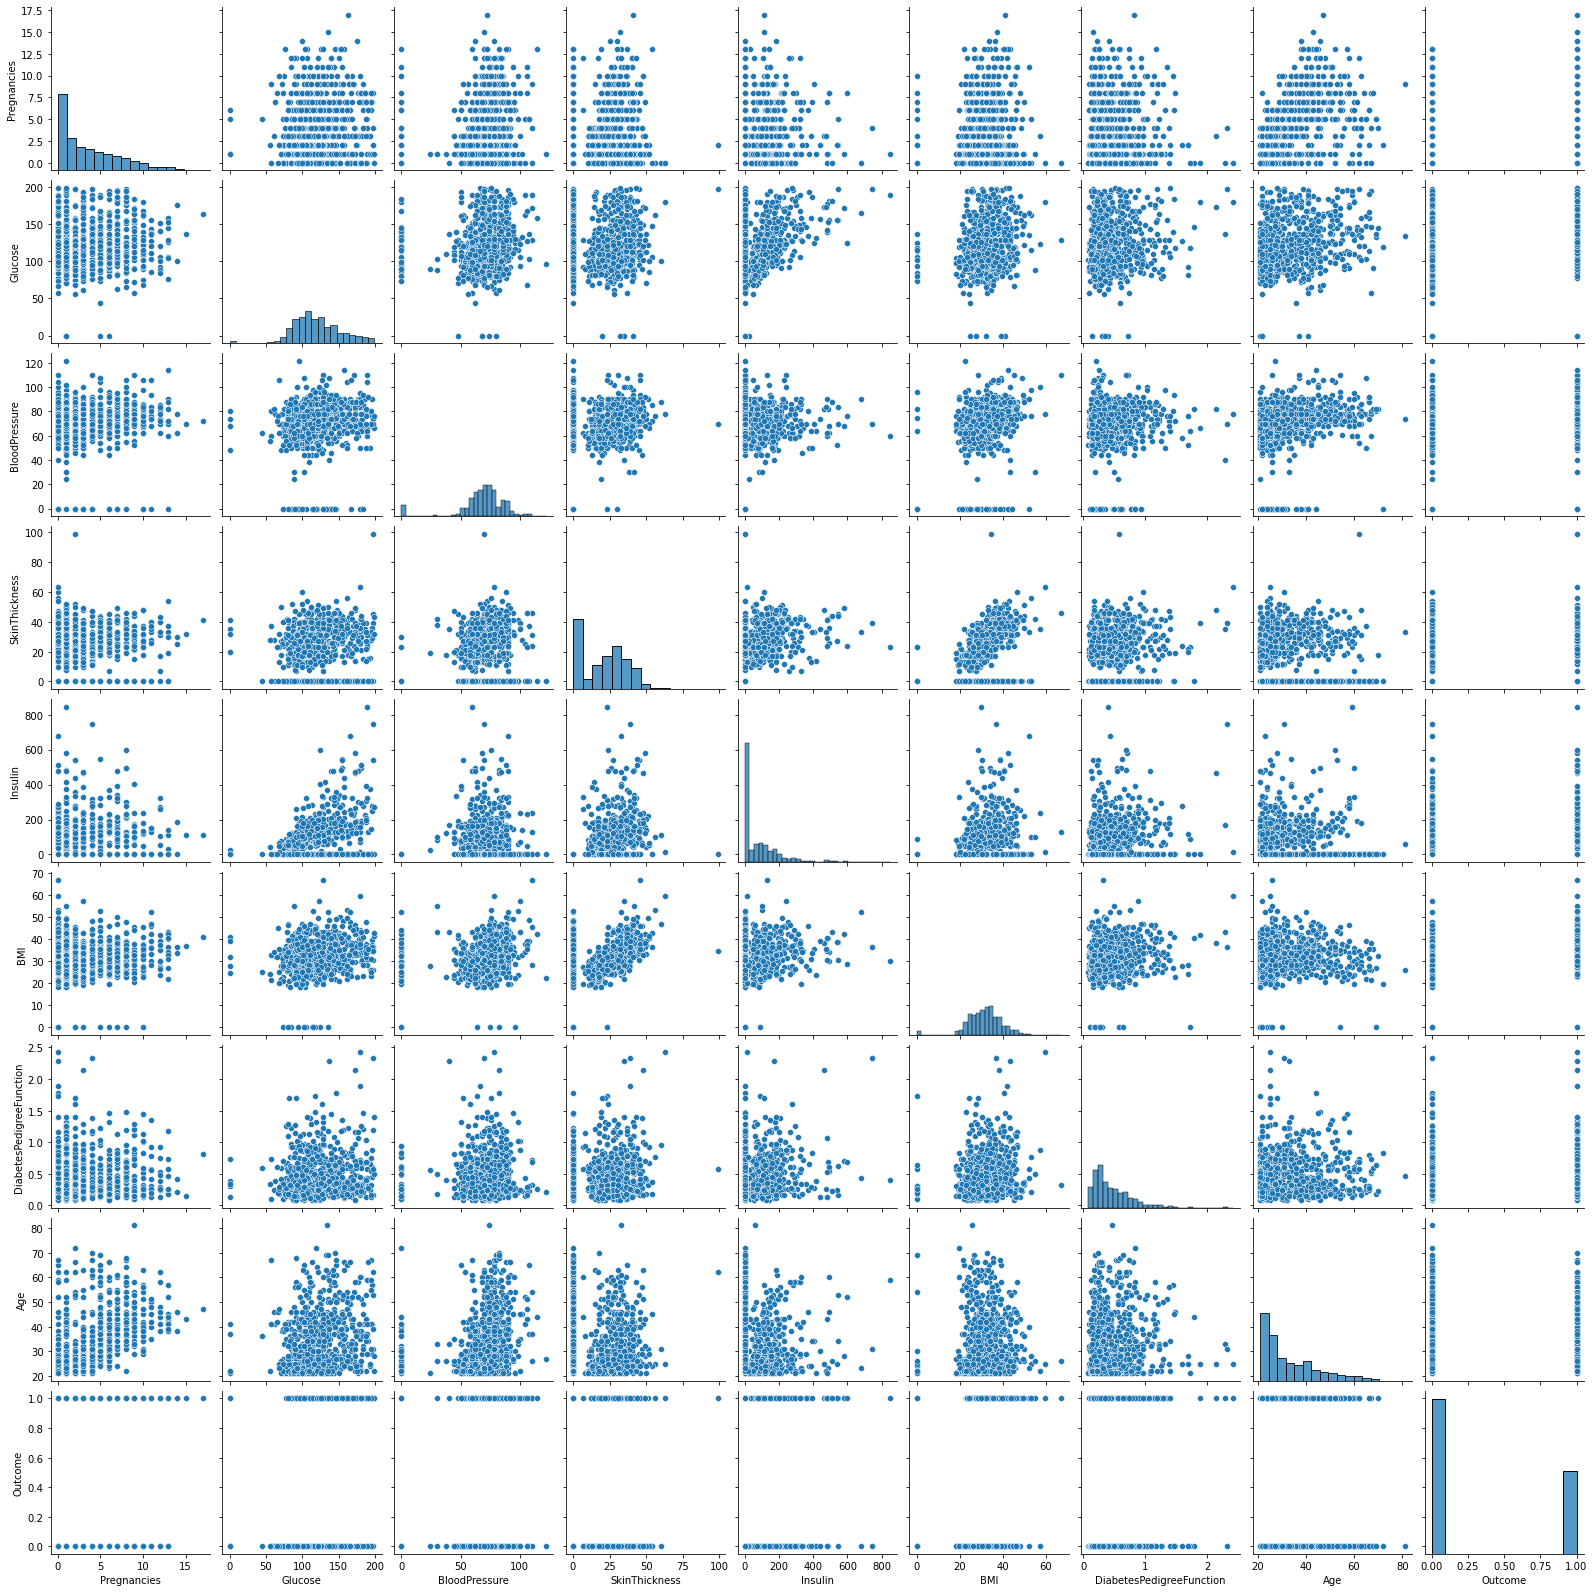

In [85]:
sns.pairplot(df)

<AxesSubplot:>

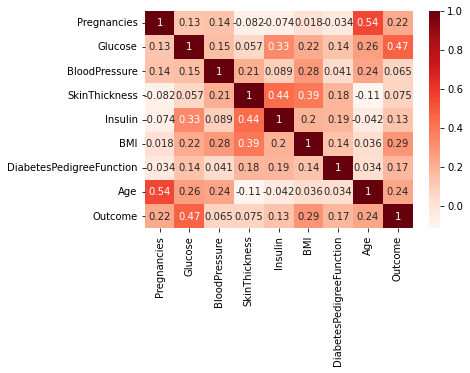

In [86]:
corr=df.corr()
sns.heatmap(corr,cmap='Reds',annot=True)

#here check the row of outcomes
#we can find that what is correlation between the final result and each indiviual factors 
#from the heatmap below we can find that glucose is the factor that contributes most in the diabetes disease

# Data Standardization

In [87]:
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']
print(X.head())
print(Y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [88]:
scaler=StandardScaler()

In [89]:
scaler.fit(X)

StandardScaler()

In [90]:
standard_data=scaler.transform(X)
print(standard_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [91]:
X = standard_data

# Splitting the data for training and testing purpose

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=0)

stratify ensures that there is equal distribution of both diabetic and non-diabetic cases while splitting the dataset

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [95]:
X_test

array([[-0.54791859, -2.03101358, -0.67752325, ..., -0.98902814,
        -0.42244303, -0.95646168],
       [-0.84488505, -0.90431634, -0.36733675, ..., -1.58554859,
         0.03057477, -0.70119842],
       [-0.84488505, -0.65393918,  0.25303625, ..., -1.58554859,
        -0.97512475, -0.44593516],
       ...,
       [ 0.3429808 ,  1.41167241,  0.35643175, ...,  1.73973564,
        -0.39828208, -0.53102292],
       [-0.84488505, -0.46615631,  0.04624525, ...,  0.28016432,
        -0.99626558, -0.95646168],
       [-0.54791859, -0.27837344, -0.05715025, ...,  0.26747239,
        -0.47378505, -0.61611067]])

# Training the model by SVM

In [35]:
classifier=svm.SVC(kernel='linear')

In [36]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Accuracy score for trained data

In [37]:
X_train_predict=classifier.predict(X_train)
training_data_acc=accuracy_score(X_train_predict,Y_train)

In [38]:
print("Accuracy score of training data",training_data_acc)

Accuracy score of training data 0.7801302931596091


In [39]:
# Testing the model

In [40]:
X_test_predict=classifier.predict(X_test)
testing_data_acc=accuracy_score(X_test_predict,Y_test)

In [41]:
print("Accuracy score of testing data",testing_data_acc)

Accuracy score of testing data 0.7792207792207793


<AxesSubplot:>

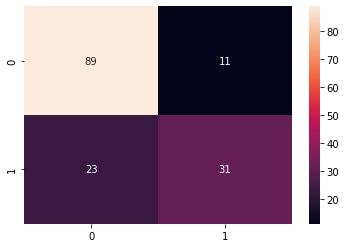

In [42]:

svm_cm=confusion_matrix(Y_test,X_test_predict)
sns.heatmap(svm_cm,annot=True)

From above confusion matrix we can understand:-
0,0 means true negative and 1,1 means true positive 
and 0,1 means even person is negative but showing result positive
and 1,0 means person is positive but shows negative so its danger 

so out of 154 cases 120 are correct results and 34 are incorrect results

# Trying the knn algorithm of model building to increase the accuracy

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25,metric='minkowski')
#minkowski means distance 
knn.fit(X_train,Y_train)



KNeighborsClassifier(n_neighbors=25)

In [107]:
knn_y_prediction=knn.predict(X_test) 

knn_y_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [114]:
input_data=([1,85,66,29,0,26.6,0.351,31])
input_data_reshaped = input_data.reshape(1,-1)
ans=knn.predict(input_data)

ans

AttributeError: 'list' object has no attribute 'reshape'

In [115]:
knn_accuracy=accuracy_score(Y_test,knn_y_prediction)
print(knn_accuracy)

0.7922077922077922


<AxesSubplot:>

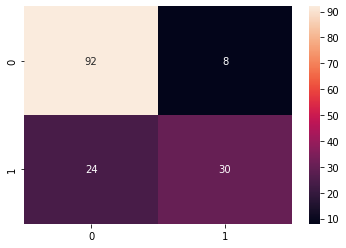

In [103]:
knn_cm=confusion_matrix(Y_test,knn_y_prediction)
sns.heatmap(knn_cm,annot=True)

From above confusion matrix we can understand:- 0,0 means true negative and 1,1 means true positive and 0,1 means even person is negative but showing result positive and 1,0 means person is positive but shows negative so its danger

so out of 154 cases 122 are correct results and 32 are incorrect results

# Trying Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [49]:
lr_accurracy=accuracy_score(Y_test,y_pred)
print(lr_accurracy)

0.7792207792207793


<AxesSubplot:>

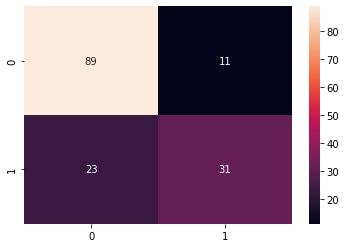

In [50]:
lr_cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(lr_cm,annot=True)

# making predictive system

In [62]:
print("WELCOME TO DIABETES PREDICTION SYSTEM\n")

print("Enter the following data to know if you may be diabetic or not\n\n")


WELCOME TO DIABETES PREDICTION SYSTEM

Enter the following data to know if you may be diabetic or not




In [63]:
print("Enter the number of pregnancies")
pregnancies=int(input())
print("Your data is entered")

Enter the number of pregnancies
5
Your data is entered


In [64]:
print("Enter the value of glucose")
glucose=float(input())
print("Your data is entered")

Enter the value of glucose
166
Your data is entered


In [65]:
print("Enter the value of blood pressure")
bloodpressure=float(input())
print("Your data is entered")

Enter the value of blood pressure
72
Your data is entered


In [66]:
print("Enter the value of skin thickness (mm)")
skinthickness=float(input())
print("Your data is entered")

Enter the value of skin thickness (mm)
19
Your data is entered


In [67]:
print("Enter the value of insulin (mu U/ml)")
insulin=float(input())
print("Your data is entered")

Enter the value of insulin (mu U/ml)
175
Your data is entered


In [68]:
print("Enter the value of BMI (weight in kg/(height in m)^2)")
bmi=float(input())
print("Your data is entered")

Enter the value of BMI (weight in kg/(height in m)^2)
25.8
Your data is entered


In [69]:
print("Enter the value of Diabetes pedigree function")
DiabetesPedigreeFunction=float(input())
print("Your data is entered")

Enter the value of Diabetes pedigree function
0.587
Your data is entered


In [70]:
print("Enter your age")
age=int(input())
print("Your data is entered")

Enter your age
51
Your data is entered


In [93]:
input_data =(pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,DiabetesPedigreeFunction,age)
#input_data = (5,166,72,19,175,25.8,0.587,51)positive 
#input_data=(1,165,70,20,156,21,0.23,25) non positive 

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data 
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [116]:
import pickle
pickle_out=open("knn.pkl","wb")
pickle.dump(knn,pickle_out)
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle_out.close()